<a href="https://colab.research.google.com/github/sarathkumar271002/Complete_ML_Project-Pakistan_House_price_prediction-Regression-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pprint import pprint
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans

# Saving trained models for future deployment.
import pickle

from sklearn.metrics import confusion_matrix

# ***EDA***

# **Data Loading**

In [5]:
df=pd.read_csv('/content/house prediction dataset.csv')

# **Data summary**

In [6]:
df.shape

(168446, 18)

In [7]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,168446.0,8.422250e+04,4.862632e+04,0.000000,4.211125e+04,8.422250e+04,1.263338e+05,1.684450e+05
property_id,168446.0,1.559626e+07,2.251207e+06,86575.000000,1.488320e+07,1.665851e+07,1.708662e+07,1.735772e+07
location_id,168446.0,4.375936e+03,3.776562e+03,1.000000,1.058000e+03,3.286000e+03,7.220000e+03,1.422000e+04
price,168446.0,1.776576e+07,3.531003e+07,0.000000,1.750000e+05,8.500000e+06,1.950000e+07,2.000000e+09
latitude,168446.0,2.985952e+01,3.807870e+00,11.052446,2.494854e+01,3.145978e+01,3.356089e+01,7.318409e+01
longitude,168446.0,7.123980e+01,3.133042e+00,25.906027,6.713036e+01,7.305618e+01,7.325987e+01,8.016143e+01
baths,168446.0,2.874227e+00,2.463400e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,168446.0,3.179422e+00,1.971401e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
Total_Area,168446.0,1.394239e+04,8.623647e+05,0.000000,1.905757e+03,4.356016e+03,1.197904e+04,3.387988e+08


In [10]:
cols = ['property_type', 'city', 'province_name', 'purpose', 'location', 'bedrooms']
for col in cols:
  print(f'{col} : {df[col].unique()}')
  print("---------------------------")

property_type : ['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room']
---------------------------
city : ['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
---------------------------
province_name : ['Islamabad Capital' 'Punjab' 'Sindh']
---------------------------
purpose : ['For Sale' 'For Rent']
---------------------------
location : ['G-10' 'E-11' 'G-15' ... 'Samanzar Colony' 'Shahra-e-Liaquat' 'Sundar']
---------------------------
bedrooms : [ 2  3  5  4  8  7  0  1  6 10 12  9 11 14 15 16 13 18 28 25 21 68 27]
---------------------------


# **Identifing null values**

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0


# **Identifing duplicate values**

In [12]:
df.duplicated().sum()

np.int64(0)

# **Univariate and Bivariate Analysis**

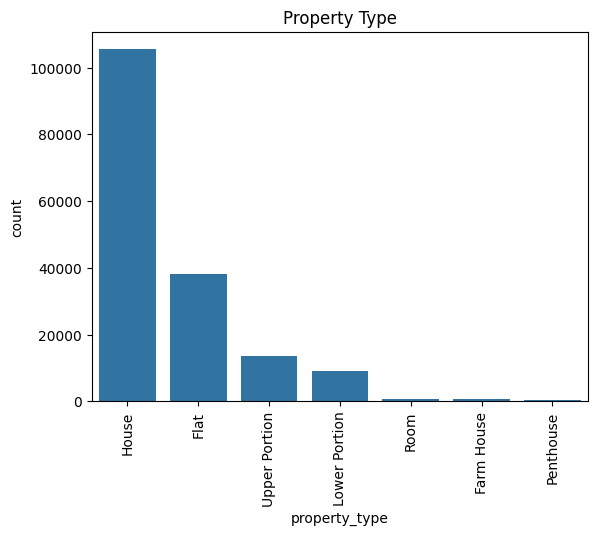

In [13]:
# Bar plot
sns.barplot(x=df['property_type'].value_counts().index, y=df['property_type'].value_counts())
plt.title('Property Type')
plt.xticks(rotation=90)
plt.show()

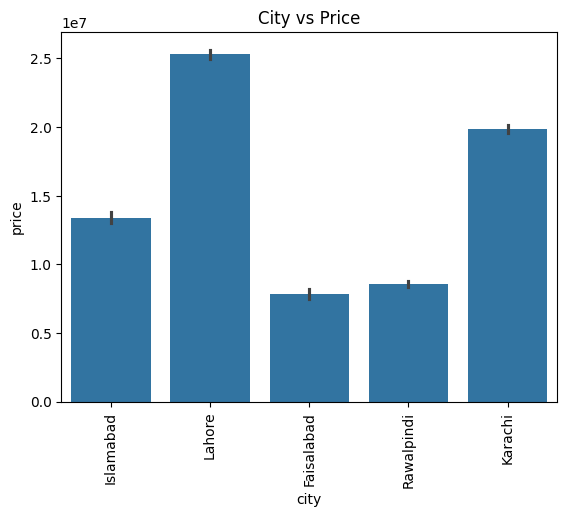

In [14]:
sns.barplot(data=df, x='city', y='price')
plt.title('City vs Price')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Contingency table
contingency_table = pd.crosstab(df['purpose'], df['property_type'])
print(contingency_table)

property_type  Farm House   Flat  House  Lower Portion  Penthouse  Room  \
purpose                                                                   
For Rent               48  10120  17492           8225        100   660   
For Sale              609  28118  87976           1004        295    25   

property_type  Upper Portion  
purpose                       
For Rent               11146  
For Sale                2628  


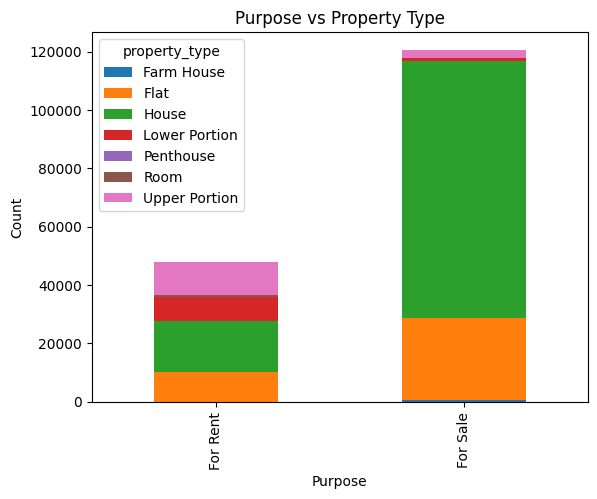

In [16]:
# Stacked bar chart
contingency_table.plot(kind='bar', stacked=True)
plt.title('Purpose vs Property Type')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

# **Outliers**

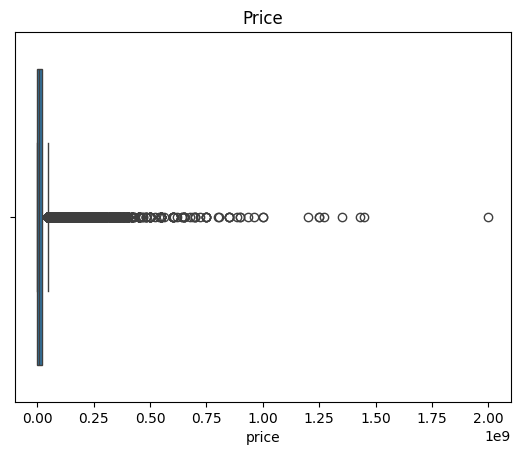

In [17]:
# Box plot
sns.boxplot(x=df['price'])
plt.title('Price')
plt.show()

# **Correlation**

In [18]:
c = df.select_dtypes(exclude='object').corr()
c

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
Unnamed: 0,1.000000,0.831999,-0.001230,-0.045190,0.007725,0.011502,-0.127251,-0.076331,0.005018
property_id,0.831999,1.000000,0.006564,-0.029669,-0.010461,-0.002722,-0.101769,-0.066577,0.002461
location_id,-0.001230,0.006564,1.000000,-0.098426,-0.293129,-0.282903,-0.121941,-0.138452,-0.002041
price,-0.045190,-0.029669,-0.098426,1.000000,-0.071193,-0.019225,0.230205,0.314145,0.008168
latitude,0.007725,-0.010461,-0.293129,-0.071193,1.000000,0.926888,0.053107,0.030961,0.001775
longitude,0.011502,-0.002722,-0.282903,-0.019225,0.926888,1.000000,0.099506,0.079962,-0.000606
baths,-0.127251,-0.101769,-0.121941,0.230205,0.053107,0.099506,1.000000,0.669210,-0.001564
bedrooms,-0.076331,-0.066577,-0.138452,0.314145,0.030961,0.079962,0.669210,1.000000,0.004024
Total_Area,0.005018,0.002461,-0.002041,0.008168,0.001775,-0.000606,-0.001564,0.004024,1.000000


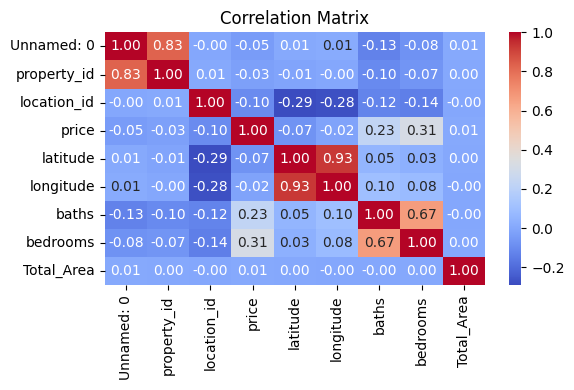

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Data preprocessing**

In [20]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [21]:
# Drop unwanted columns
df = df.drop(columns=['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'location', 'latitude', 'longitude', 'date_added', 'agency', 'agent'])

In [22]:
df.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [23]:
cols_to_check = ['province_name', 'baths', 'purpose', 'bedrooms', 'Total_Area']
df = df.dropna(subset=cols_to_check)

# **Feature Engineering**

In [24]:
# target Transformation
df['price'] = np.log1p(df['price'])

In [25]:
# New features
df['baths_per_bedroom'] = df['baths'] / (df['bedrooms'] + 1)
df['area_per_bedroom'] = df['Total_Area'] / (df['bedrooms'] + 1)
df['area_per_bath'] = df['Total_Area'] / (df['baths'] + 1)
df['total_rooms'] = df['bedrooms'] + df['baths']
df['province_city'] = df['province_name'] + "_" + df['city']

In [26]:
df.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,Total_Area,baths_per_bedroom,area_per_bedroom,area_per_bath,total_rooms,province_city
0,Flat,16.118096,Islamabad,Islamabad Capital,2,For Sale,2,1089.004,0.666667,363.001333,363.001333,4,Islamabad Capital_Islamabad
1,Flat,15.747032,Islamabad,Islamabad Capital,3,For Sale,3,15246.056,0.750000,3811.514000,3811.514000,6,Islamabad Capital_Islamabad
2,House,16.618871,Islamabad,Islamabad Capital,6,For Sale,5,2178.008,1.000000,363.001333,311.144000,11,Islamabad Capital_Islamabad
3,House,17.588272,Islamabad,Islamabad Capital,4,For Sale,4,10890.000,0.800000,2178.000000,2178.000000,8,Islamabad Capital_Islamabad
4,House,15.761421,Islamabad,Islamabad Capital,3,For Sale,3,2178.008,0.750000,544.502000,544.502000,6,Islamabad Capital_Islamabad


# **Encoding**

In [27]:
# Columns to encode
cat_cols = ['property_type', 'city', 'province_name', 'purpose', 'province_city']

# Dictionary to store encoders
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # encode column

    # Save encoder as separate .pkl file
    with open(f"{col}_encoder.pkl", "wb") as f:
        pickle.dump(le, f)

    encoders[col] = le  # store for reference

# **Machine learning**

In [28]:
x=df.drop("price",axis=1)
y=df["price"]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

In [31]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}

decisiontree Regressor accuracy score:  0.9811519097162014 0.9687840906946341
RandomForestRegressor accuracy score:  0.9804075505310217 0.9725555586020207
GradientBoostingRegressor accuracy score:  0.9629834071883631 0.9619271631753203
AdaBoostRegressor accuracy score:  0.8731317309954283 0.8720778809807593
Extra Trees Regressor accuracy score:  0.9811519097162014 0.9717515820128052


In [35]:
from sklearn.ensemble import RandomForestRegressor
import pickle

# Train model with default parameters
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Save the trained model as a .pkl file
with open("randomforest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# **Streamlit Part**

In [39]:
!pip install streamlit pyngrok

In [45]:
NGROK_AUTH_TOKEN = ""
!ngrok authtoken 30y06aS09CrHLdHMts1Ip0TG3ro_7vpAv7SSNQ1h5HJdfHu3K


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [62]:
code = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import base64

# ===============================
# Page Config
# ===============================
st.set_page_config(page_title="House Price Prediction", layout="centered")

# Function to convert image to Base64
def get_base64_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode()

image_path = "/content/house_wp.jpeg"  # Colab-ல் upload பண்ணிய path
base64_image = get_base64_image(image_path)

# Background + Font + Button CSS
page_bg_img = f"""
<style>
[data-testid="stAppViewContainer"] {{
    background-image: url("data:image/jpeg;base64,{base64_image}");
    background-size: cover;
    background-position: center;
    background-attachment: fixed;
}}
[data-testid="stHeader"] {{background-color: rgba(0,0,0,0);}}
h1, h2, h3, h4, h5, h6, p, label, span {{
    color: black !important;
}}
div.stButton > button:first-child {{
    background-color: white;
    color: black;
    border: 1px solid black;
    border-radius: 8px;
    padding: 0.5em 1em;
    font-weight: bold;
}}
div.stButton > button:first-child:hover {{
    background-color: #f0f0f0;
    color: black;
}}
</style>
"""

st.markdown(page_bg_img, unsafe_allow_html=True)

# ===============================
# Load Model & Encoders
# ===============================
model = pickle.load(open("/content/randomforest_model.pkl", "rb"))
property_encoder = pickle.load(open("property_type_encoder.pkl", "rb"))
city_encoder = pickle.load(open("city_encoder.pkl", "rb"))
province_encoder = pickle.load(open("province_name_encoder.pkl", "rb"))
purpose_encoder = pickle.load(open("purpose_encoder.pkl", "rb"))

# ===============================
# Input Fields
# ===============================
st.title("🏠 House Price Prediction")
st.write("Fill the details below:")

col1, col2 = st.columns(2)

with col1:
    property_type = st.selectbox("Property Type", property_encoder.classes_)
    city = st.selectbox("City", city_encoder.classes_)
    province_name = st.selectbox("Province", province_encoder.classes_)
    purpose = st.selectbox("Purpose", purpose_encoder.classes_)

with col2:
    baths = st.number_input("Number of Bathrooms", min_value=0, step=1)
    bedrooms = st.number_input("Number of Bedrooms", min_value=0, step=1)
    total_area = st.number_input("Total Area (sq.ft)", min_value=1)

# ===============================
# Prediction Logic
# ===============================
if st.button("Predict Price 💰"):
    # Encode categorical
    property_type_encoded = property_encoder.transform([property_type])[0]
    city_encoded = city_encoder.transform([city])[0]
    province_encoded = province_encoder.transform([province_name])[0]
    purpose_encoded = purpose_encoder.transform([purpose])[0]

    # Create dataframe from user input
    input_df = pd.DataFrame([[
        property_type_encoded,
        city_encoded,
        province_encoded,
        baths,
        purpose_encoded,
        bedrooms,
        total_area
    ]], columns=['property_type', 'city', 'province_name', 'baths', 'purpose', 'bedrooms', 'Total_Area'])

    # Feature Engineering
    input_df['baths_per_bedroom'] = input_df['baths'] / (input_df['bedrooms'] + 1)
    input_df['area_per_bedroom'] = input_df['Total_Area'] / (input_df['bedrooms'] + 1)
    input_df['area_per_bath'] = input_df['Total_Area'] / (input_df['baths'] + 1)
    input_df['total_rooms'] = input_df['bedrooms'] + input_df['baths']
    input_df['province_city'] = str(province_encoded) + "_" + str(city_encoded)

    # Drop unused columns if present
    features_for_model = input_df.drop(columns=['price_per_area', 'province_price_ratio'], errors='ignore')

    # Predict
    log_price_pred = model.predict(features_for_model)[0]
    price_pred = np.expm1(log_price_pred)

    # Green styled output box
    st.markdown(
        f"""
        <div style='background-color:#d4edda; padding:15px; border-radius:8px;
                    border:2px solid black; color:black; font-weight:bold;
                    font-size:20px;'>
            💲 Predicted House Price: {price_pred:,.2f}
        </div>
        """,
        unsafe_allow_html=True
    )
'''

with open("app.py", "w") as f:
    f.write(code)


In [47]:
# 4️⃣ Run Streamlit app with ngrok
from pyngrok import ngrok

# Streamlit default port
port = 8501
public_url = ngrok.connect(port)
print("🔗 Public URL:", public_url)

!streamlit run app.py --server.port {port} --server.address 0.0.0.0


🔗 Public URL: NgrokTunnel: "https://6af9674c896d.ngrok-free.app" -> "http://localhost:8501"


2025-08-11 17:13:45.313 Port 8501 is already in use
